In [1]:
from tensorflow import keras
import numpy as np
import sklearn.metrics as sk
import matplotlib.pyplot as plt
import itertools
import os


In [2]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Enter the path to the directory where the pb file is stored

model = keras.models.load_model('C:/Users/samee/Documents/Imagine Cup Saved Models/Test combined v unique/Combined/04-0.78.h5')

In [49]:
# Enter the path to the validation/test directory

test_directory = 'C:/Users/samee/Downloads/Combined-Binary/Valid/ValidPA'

In [50]:
test_dataset = keras.preprocessing.image_dataset_from_directory(
        test_directory, 
        batch_size= 32,
        image_size=(224, 224), 
        color_mode='rgb',
        label_mode='binary',
        shuffle = False,
        seed = 7
    )

Found 19346 files belonging to 2 classes.


In [51]:
# Chex = model.predict(test_dataset, verbose = 1)
combined = model.predict(test_dataset, verbose = 1)

605/605 [==============================] - 57s 92ms/step


In [52]:
np.round(combined)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [16]:
def test_categorical(y_pred):
    labels = np.array([])
    for x, y in test_dataset:
        # labels = np.concatenate([labels, np.argmax(y.numpy(), axis = -1)])
        print(y)
    # prediction = np.argmax(y_pred, axis = -1)
    # # cm = sk.confusion_matrix(y_true = labels, y_pred = prediction)
    # # return cm
    # acc = sk.classification_report(labels, prediction)
    # return acc

In [53]:
from sklearn import metrics
import seaborn as sns

def test_binary(y_pred):
    labels = np.array([])
    for x, y in test_dataset:
        for i in y:
            labels = np.concatenate([labels, i])
    prediction = np.round(y_pred)
    # cm = sk.confusion_matrix(y_true = labels, y_pred = prediction)
    # return cm
    #old acc
    #acc = sk.classification_report(labels, prediction)
    
    #NEW CODE
    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(labels, prediction)
    prec = metrics.precision_score(labels, prediction)
    rec = metrics.recall_score(labels, prediction)
    f1 = metrics.f1_score(labels, prediction)
    kappa = metrics.cohen_kappa_score(labels, prediction)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(labels)[::,1]
    fpr, tpr, _ = metrics.roc_curve(labels, y_pred_proba)
    auc = metrics.roc_auc_score(labels, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(labels, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

    #END OF NEW CODE
    #Old Return
    #return acc

#Example of using the code
eval = test_binary(idk)

print('Accuracy:', eval['acc'])
print('Precision:', eval['prec'])
print('Recall:', eval['rec'])
print('F1 Score:', eval['f1'])
print('Cohens Kappa Score:', eval['kappa'])
print('Area Under Curve:', eval['auc'])
print('Confusion Matrix:\n', eval['cm'])
sns.heatmap(eval['cm'], annot = True, cmap = 'YlOrBr')


In [54]:
a = test_binary(combined)

In [36]:
print(a)

              precision    recall  f1-score   support

         0.0       0.54      0.41      0.47     10386
         1.0       0.46      0.58      0.52      8960

    accuracy                           0.49     19346
   macro avg       0.50      0.50      0.49     19346
weighted avg       0.50      0.49      0.49     19346



In [16]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization


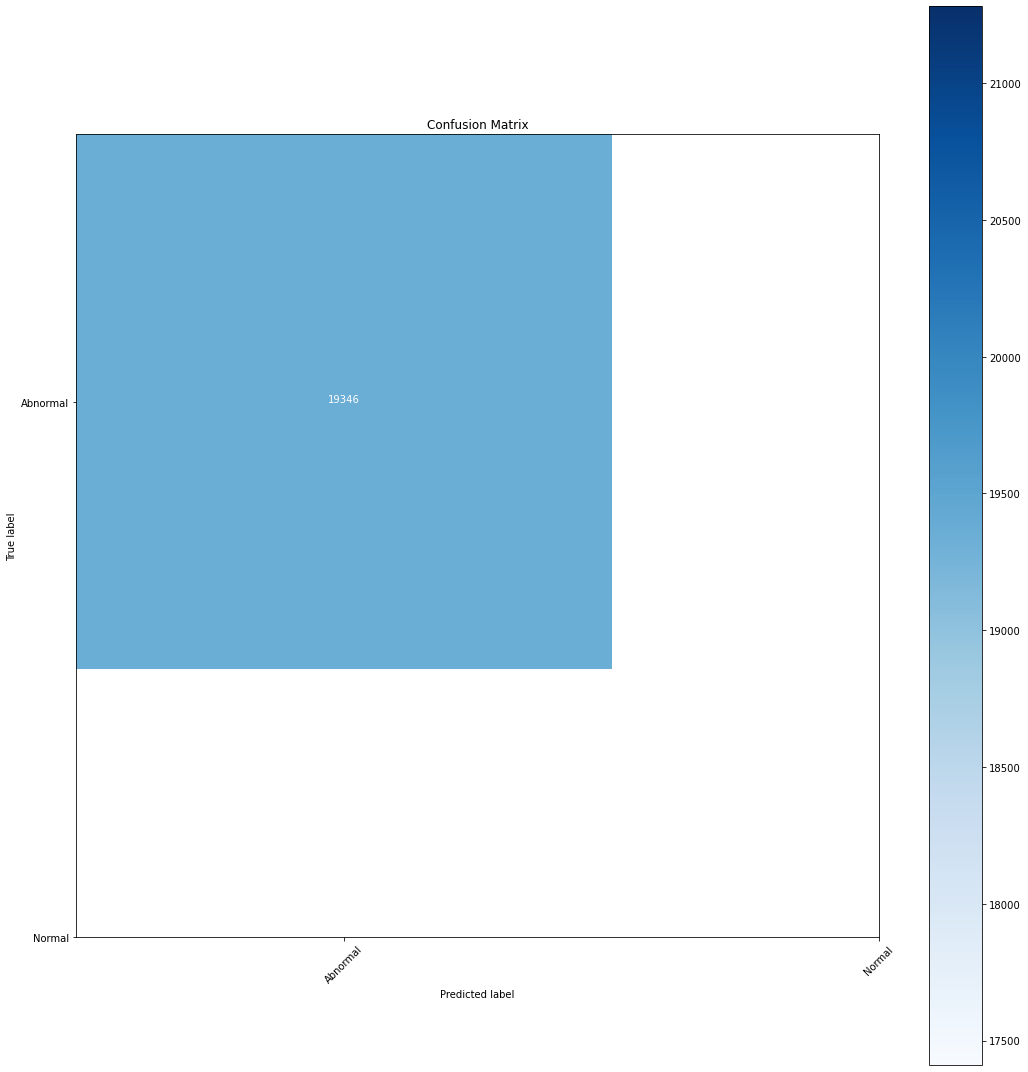

In [17]:
folders = os.listdir(test_directory)
plt.rcParams['figure.figsize'] = [15, 15]
# plot_confusion_matrix(test(Chex), title = 'Confusion Matrix', classes = folders, normalize = False)